In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

import os
#os.chdir('../')
#os.chdir('C:/Users/rtemporale/Documents/Austral/Modulo2/Bases/BankMarketing/')
os.getcwd()
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score

import matplotlib.pyplot as plt


In [2]:
os.getcwd()

'C:\\Users\\rtemporale\\Documents\\Austral\\Modulo2\\Bases\\BankMarketing'

In [6]:
Bank_procesada = pd.read_csv("BankMarketingTotal.csv",sep=";")

Tomamos el archivo de salida del trabajo anterior  BankMarketingTotal.csv

In [7]:
Bank_procesada.head()

,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,student_retired,degree,previousProd,marriedAdmin,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,cuartilesAge,decilesAge,bucketsAge
0,0,0,0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,9,"(50, 60]"
1,0,0,0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,9,"(50, 60]"
2,0,1,0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,4,"(30, 40]"
3,0,0,0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,5,"(30, 40]"
4,0,0,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,9,"(50, 60]"


In [9]:
#Elimino columnas que no se utilizaran en el entrenamiento del modelo y separo en train y test
X = Bank_procesada.drop(columns = ["default", "y","bucketsAge"])
Y = Bank_procesada.y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [10]:
X.head()


,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,student_retired,degree,previousProd,marriedAdmin,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,cuartilesAge,decilesAge
0,0,0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,9
1,0,0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,9
2,1,0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,4
3,0,0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,5
4,0,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,9


In [11]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [12]:
print(X_train.shape)
print(X_test.shape)

(27595, 34)
(13593, 34)


In [13]:
print(Y_train.shape)
print(Y_test.shape)

(27595,)
(13593,)


Los árboles de decisión pueden ser de clasificación y de regresión, con esta base (base BankMarketing) vamos a utilizar un árbol de decisión de clasificación para poder predecir si un cliente se suscribe o no.\
 La librería con la que vamos a trabajar es Scikit-Learn, en ella tenemos muchísimas funciones que nos ayudarán a la hora de trabajar en ciencia de datos. En este caso dicha librería tiene implementado el algoritmo para poder crear árboles de decisión (tanto de clasificación como de regresión) la Documentación la pueden encontrar en el siguiente link

## Los parámetros que podemos ajustar en el modelo son:
**DecisionTreeClassifier**
* criterion ({"gini", "entropy"}): Valor default="gini" Es la métrica que medirá la calidad del split. 
* splitter: Este parámetro es utilizado para la selección de las variables. {“best”, “random”}, default=”best”. Si seleccionamos *best* elegirá la variable que mejor split genere. Si seleccionamos *random* elegirá la variable aleatoriamente y buscará splits de forma aleatoria, luego buscará el mejor de todos los splits.
* max_depth (int): Valor default=None. Este parámetro medirá la máxima profundidad que tendrá el árbol. Si el valor es None, lo que hará es crecer el árbol hasta que las hojas queden puras o hasta que la cantidad de observaciones sea menor al parámetro min_samples_split. Tengan en cuenta que este parámetro hará que generalicemos más o menos el algoritmo.
* min_samples_split (int o float): Valor default=2. Este parámetro nos indica la cantidad de observaciones mínimas que debe tener un nodo para que se realice un split. Si el valor ingresado es un entero, será considerado un valor absoluto (definido como el mínimo de observaciones para el split), si el valor ingresado es un float, el número será la división entre el valor ingresado y el total de observaciones de la base.
* min_samples_leaf (int o float): Valor default=1. Este parámetro nos indica cuál es el número mínimo que debe tener un nodo para ser nodo hoja. El cálculo del valor es igual al parámetro anterior.
* min_weight_fraction_leaf (float): Valor default=0. Este parámetro ayuda a determinar el tamaño mínimo del nodo final de cada árbol de decisión. El nodo final también se conoce como hoja. Esto es bastante similar a min_samples_leaf, pero en su lugar utiliza una fracción de la suma total de observaciones.
* max_features (int, float o {"auto", "sqrt", "log2"}): Valor default=None. El número de variables a considerar para buscar el mejor split. Si el valor es int, se considera como el número maxímo de variables. Si el valor es float, se calculará como multiplicación de max_features y la cantidad total de variables. Si el valor es auto, se calcula como la raíz cuadrada del total de variables lo mismo que si el parámetro posee el valor sqrt. Si el parámetro posee el valor log2, entonces se calculará como el log2 del total de variables. Si el valor es None, se usarán todas las variables.
* random_state (int): Valor default=None. Controla el factor aleatorio del estimador. Este parámetros es muy utilizado para poder lograr que las ejecuciones sean siempre iguales (teniendo en cuenta que usamos los mismos hiperparámetros).
* max_leaf_nodes (int): Valor default=None. Es la cantidad máxima de de nodos hoja que vamos a querer tener en un árbol. Este es otro parámetro que podemos ajustar a la hora de mejorar la generalización del modelo. Si el valor es None, crecerá a tantos nodos hojas como el modelo cree necesario.
* min_impurity_decrease (float): Valor default=0. Un nodo se dividirá si el split genera un decrecimiento en la impureza menor o igual al valor definido.
* class_weight (dict, lista de dicts o "balanced"): Valor default=None. Este parámetro sirve para balancear las clases, es decir, si tenemos clases desbalanceadas le pasaremos un diccionario en el peso que posee cada una de las clases en la base de entrenamiento. Si usamos el valor "balanced", automáticamente el modelo ajustará las clases inversamente proporcional a la frecuencia de las clases (n_samples / (n_clases * np.bincount(y))
* ccp_alpha (float no negativo): Valor default=0. Parámetro de complejidad utilizado para la poda de costo mínimo-complejidad. Se elegirá el subárbol que posea el mayor valor pero siempre siendo menor al ccp_alpha definido.

#  Profundidad = 6  Diversos Hiperp --- Mejor acuraccy 0.912013 (entropy)

In [28]:
#Inicializo el arbol. 
# Criterio Default: gini
# splitter Default: best
treeModel = tree.DecisionTreeClassifier(max_depth=6)
#Entreno el modelo con la informacion de train
treeModel.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6)

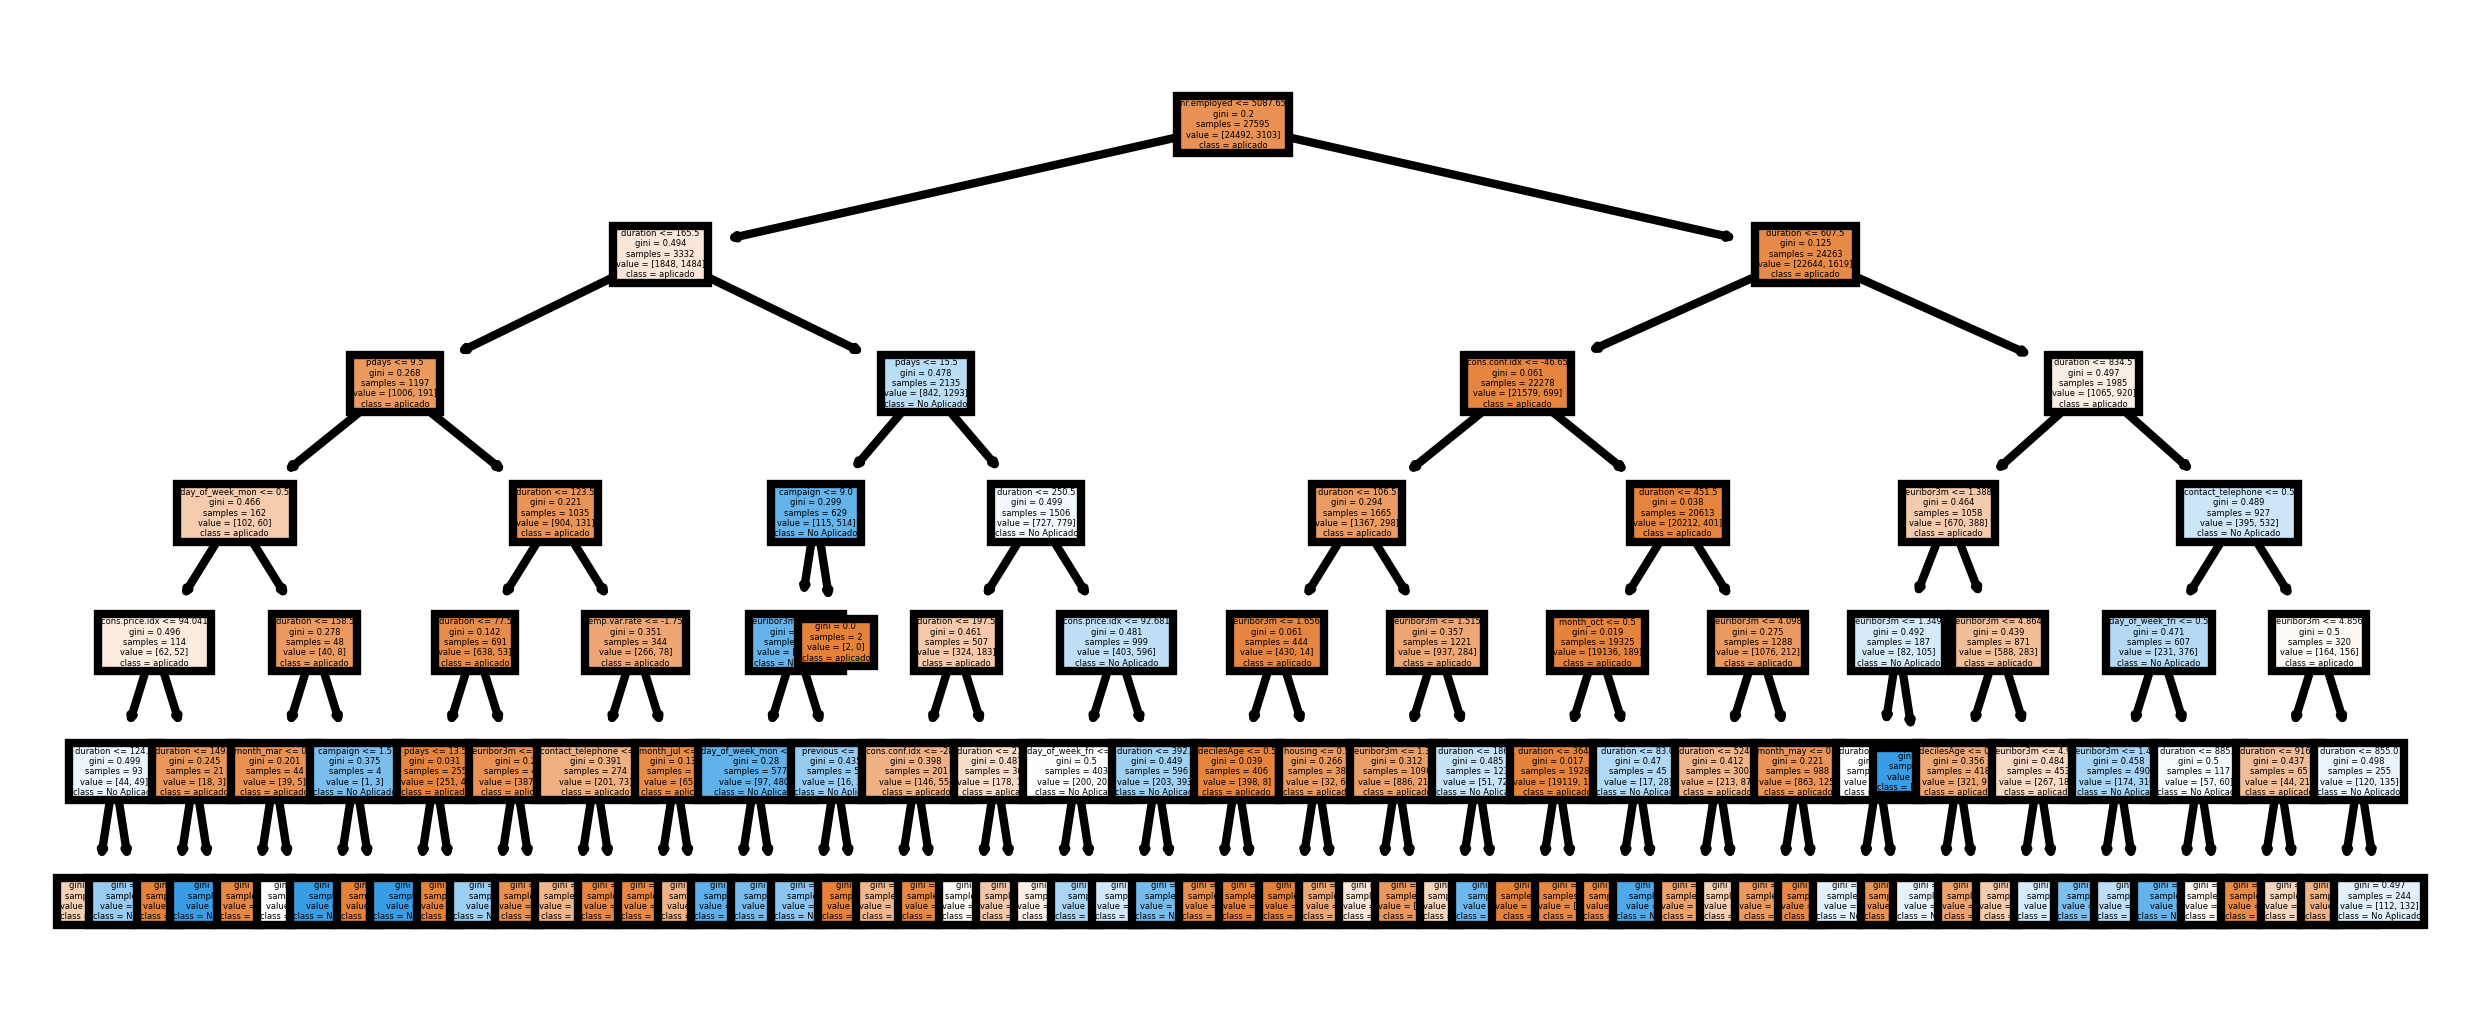

In [29]:
#Imprimo el arbol
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,2), dpi=600)
tree.plot_tree(treeModel,
               feature_names = X_train.columns, 
               class_names=["aplicado", "No Aplicado"],
               filled = True);

In [72]:
#Generamos las predicciones y medimos el acuraccy
predictedValues = treeModel.predict(X_test)
accuracy_score(Y_test, predictedValues)

0.9120135363790186

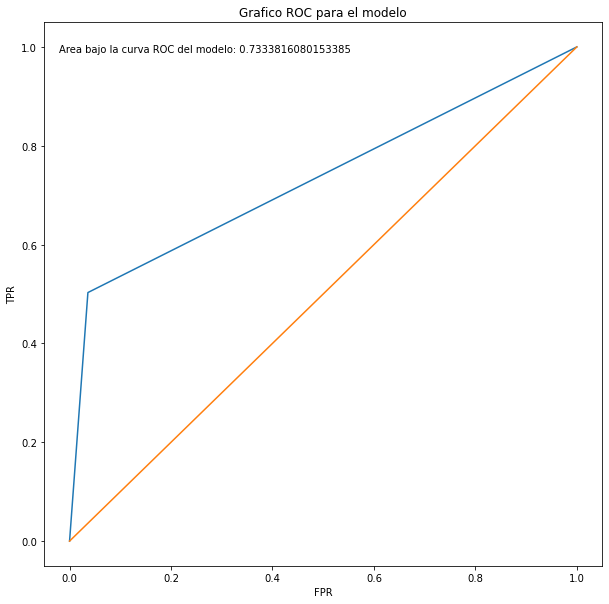

In [33]:
# Observamos la curva ROC del modelo con profundidad = 6 y criterio = gini
areaBajoCurvaRoc = roc_auc_score(Y_test, predictedValues)
fpr, tpr, _ = roc_curve(Y_test, predictedValues)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()

Vemos la matriz de confusion

In [34]:
# MAtriz de confusion indica que el algoritmo no distingue apropiadamente los casos de exito 
pd.DataFrame(confusion_matrix(Y_test, predictedValues))

,0,1
0,11620,436
1,764,773


# Modificacion de criterios en busca de mejor ACURRACY

In [37]:
# Modificamos criterio y observamos que MEJORA accuracy con respecto a default: gini
treeModel = tree.DecisionTreeClassifier(max_depth=6, criterion="entropy")
treeModel.fit(X_train, Y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(Y_test, predictedValues)

0.9120135363790186

In [40]:
# Modificamos splitter y observamos que NO MEJORA accuracy, me quedo con valor default: best
treeModel = tree.DecisionTreeClassifier(max_depth=6,  criterion="entropy", splitter="random")
treeModel.fit(X_train, Y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(Y_test, predictedValues)

0.9020083866696094

In [54]:
# Modificamos max_features (int, float o {"auto", "sqrt", "log2"}) y observamos que NO MEJORA accuracy, me quedo con valor  default: None
treeModel = tree.DecisionTreeClassifier(max_depth=6,  criterion="entropy", max_features= "sqrt")
treeModel.fit(X_train, Y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(Y_test, predictedValues)

0.9000956374604576

In [63]:
# Modificamos max_leaf_nodes y observamos que NO MEJORA accuracy, me quedo con valor  default: None
treeModel = tree.DecisionTreeClassifier(max_depth=6,  criterion="entropy", max_leaf_nodes= 2)
treeModel.fit(X_train, Y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(Y_test, predictedValues)

0.8869270948282204

In [67]:
# # Modificamos class_weight y observamos que NO MEJORA accuracy, me quedo con valor  default: None
treeModel = tree.DecisionTreeClassifier(max_depth=6,  criterion="entropy", class_weight ="balanced")
treeModel.fit(X_train, Y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(Y_test, predictedValues)

0.8350621643492975

El MEJOR MODELO fue con profundidad 6 y criterio entropy. Observamos la curva ROC

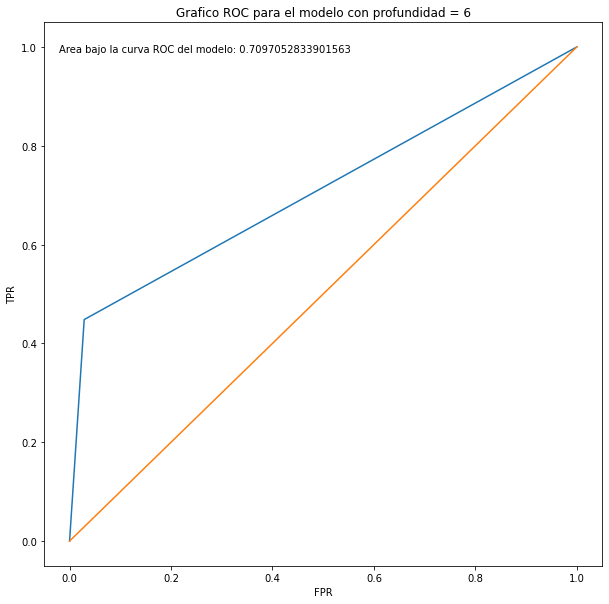

In [98]:
# Observamos la curva ROC del modelo con profundidad = 6
treeModel = tree.DecisionTreeClassifier(max_depth=6, criterion="entropy")
treeModel.fit(X_train, Y_train)
predictedValues = treeModel.predict(X_test)

areaBajoCurvaRoc = roc_auc_score(Y_test, predictedValues)
fpr, tpr, _ = roc_curve(Y_test, predictedValues)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo con profundidad = 6")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()

#  Comparacion con otras profundidades  --- max_depth=5 : Accuracy 0,9135

In [77]:
# Minimizamos max_depth y observamos que NO MEJORA accuracy, me quedo con valor anterior: 6 -- Acurracy 0,912013
treeModel = tree.DecisionTreeClassifier(max_depth=3,  criterion="entropy")
treeModel.fit(X_train, Y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(Y_test, predictedValues)

0.9082616052379902

In [85]:
# Modificamos max_depth y observamos que NO MEJORA accuracy, me quedo con valor anterior: 6 -- Acurracy 0,912013
treeModel = tree.DecisionTreeClassifier(max_depth=7,  criterion="entropy")
treeModel.fit(X_train, Y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(Y_test, predictedValues)

0.9118664018244684

In [100]:
# Modificamos max_depth y observamos que MEJORA accuracy, me quedo con nuevo valor : 5 -- Accuracy 0,9135
treeModel = tree.DecisionTreeClassifier(max_depth=5,  criterion="entropy")
treeModel.fit(X_train, Y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(Y_test, predictedValues)

0.9135584492017951

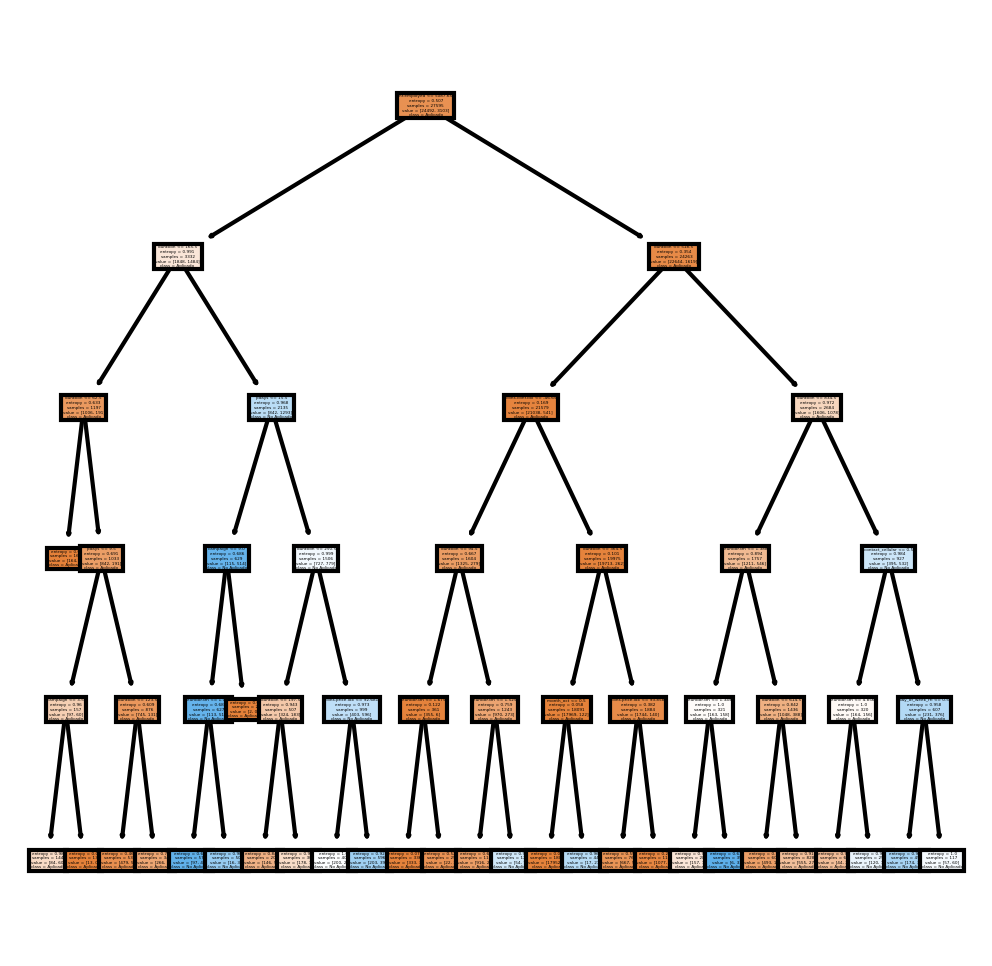

In [93]:
# Observamos arbol con profundidad 5
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(treeModel,
               feature_names = X_train.columns, 
               class_names=["Aplicado", "No Aplicado"],
               filled = True);

In [92]:
r = tree.export_text(treeModel, feature_names=list(X_train.columns))
print(r)

|--- nr.employed <= 5087.65
|   |--- duration <= 165.50
|   |   |--- duration <= 62.50
|   |   |   |--- class: 0
|   |   |--- duration >  62.50
|   |   |   |--- pdays <= 9.50
|   |   |   |   |--- campaign <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- campaign >  3.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- pdays >  9.50
|   |   |   |   |--- duration <= 123.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  123.50
|   |   |   |   |   |--- class: 0
|   |--- duration >  165.50
|   |   |--- pdays <= 15.50
|   |   |   |--- campaign <= 9.00
|   |   |   |   |--- euribor3m <= 1.05
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- euribor3m >  1.05
|   |   |   |   |   |--- class: 1
|   |   |   |--- campaign >  9.00
|   |   |   |   |--- class: 0
|   |   |--- pdays >  15.50
|   |   |   |--- duration <= 250.50
|   |   |   |   |--- duration <= 197.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  197.50
|   |   |   |   |   |---

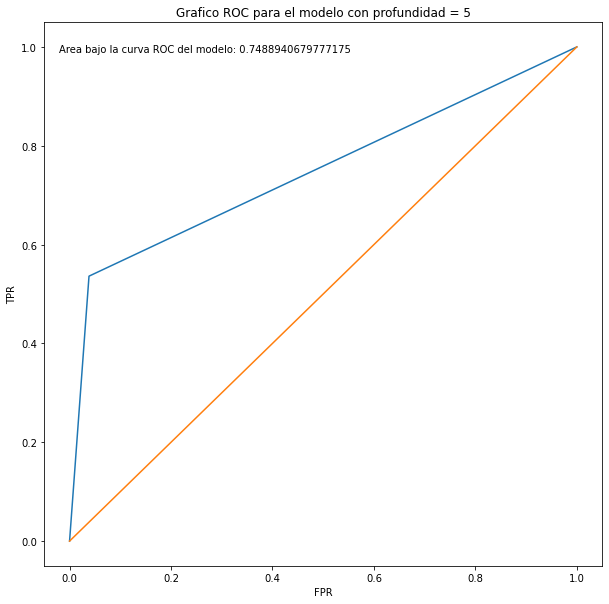

In [101]:
# Observamos como mejora la curva ROC respecto a profundidad 6 = 0,7097
areaBajoCurvaRoc = roc_auc_score(Y_test, predictedValues)
fpr, tpr, _ = roc_curve(Y_test, predictedValues)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo con profundidad = 5")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()

In [95]:
# Comparado a la matriz anterior, distingue levemente mejor los casos de éxito
pd.DataFrame(confusion_matrix(Y_test, predictedValues))

,0,1
0,11594,462
1,713,824


In [96]:
precision_score(Y_test, predictedValues)

0.640746500777605

In [97]:
recall_score(Y_test, predictedValues)

0.5361093038386467